In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-eda-case-study/Credit EDA Case Study.pdf
/kaggle/input/credit-eda-case-study/application_data.csv
/kaggle/input/credit-eda-case-study/previous_application.csv
/kaggle/input/credit-eda-case-study/columns_description.xlsx


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import plotly.express as px
import plotly. offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.io as pio
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings('ignore')
pio.renderers.default = 'iframe'
pio.templates.default = 'plotly_dark'

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Explore Dataset

In [3]:
app_data = pd.read_csv('/kaggle/input/credit-eda-case-study/application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_data.shape

(307511, 122)

In [5]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
app_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [8]:
s1=(app_data.isnull().mean()*100).sort_values(ascending=False)
s1

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [9]:
s1 = (app_data.isnull().mean()*100).sort_values(ascending=False)[app_data.isnull().mean()*100>40]
s1

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [10]:
fig = px.bar(data_frame=s1, x=s1.index.to_list(), y= s1.values, color=s1.values, text= s1.values.round())

fig.update_traces(textposition = 'outside',marker_coloraxis=None)
fig.update_xaxes(title= 'Columns')
fig.update_yaxes(title= 'Rows')
fig.update_layout(
    
                    title=dict(text='Null Value Percentage', x=0.5, y=0.95), 
                    title_font_size=20, 
                    showlegend=False, 
                    height=850)

In [11]:
col = (app_data.isnull().mean()*100>40)[app_data.isnull().mean()*100>40].index.to_list()

In [12]:
app_data.drop(columns=col, inplace= True)

In [13]:
app_data.shape

(307511, 73)

In [14]:
s2 = (app_data.isnull().mean()*100).sort_values(ascending=False)
s2.head(13)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
dtype: float64

In [15]:
s2.dtypes

dtype('float64')

In [16]:
app_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### Imputing missing values

In [17]:
'''
we'll impute below columns with Mode
- AMT_REQ_CREDIT_BUREAU_YEAR   
- AMT_REQ_CREDIT_BUREAU_QRT     
- AMT_REQ_CREDIT_BUREAU_MON 
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_DAY     
- AMT_REQ_CREDIT_BUREAU_HOUR
'''


for i in s2.head(10).index.to_list():
    if 'AMT_REQ_CREDIT' in i:
#         mode = app_data[i].mode()[]
#         null = app_data[i].isnull().sum()
#         I =i
#         print(f"The Mode in {I} is: {mode}.")
#         print(f'imputing missing value with mode: {mode}')
        app_data[i].fillna(app_data[i].mode()[0], inplace=True)
#         print(f'nullvalues in {} after imputation is {null}' )

In [18]:
(app_data.isnull().mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
Length: 73, dtype: float64

### Imputing Missing walues for OCCUPATION_TYPE 

In [19]:
fig = px.bar(app_data.OCCUPATION_TYPE.value_counts(), color=app_data.OCCUPATION_TYPE.value_counts(), width=1300)
fig.update_traces(textposition='outside',marker_coloraxis=None)
fig.update_xaxes(title="Ocupation Type")
fig.update_yaxes(title='Count')
fig.update_layout(
                    title=dict(text="Occupation Type Frequency", x=0.5, y=0.95),
                    title_font_size=30,
                    showlegend=True,
                    height=600)

In [20]:
app_data.OCCUPATION_TYPE.fillna('Unknown', inplace=True)
(app_data.isnull().mean()*100).sort_values(ascending=False)


EXT_SOURCE_3                   19.825307
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
Length: 73, dtype: float64

In [21]:
fig = px.bar(app_data.OCCUPATION_TYPE.value_counts(), color=app_data.OCCUPATION_TYPE.value_counts(), width=1300)
fig.update_traces(textposition='outside',marker_coloraxis=None)
fig.update_xaxes(title="Ocupation Type")
fig.update_yaxes(title='Count')
fig.update_layout(
                    title=dict(text="Occupation Type Frequency", x=0.5, y=0.95),
                    title_font_size=30,
                    showlegend=True,
                    height=600)

In [22]:
app_data.EXT_SOURCE_3.value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

### Imputing Missing Values for EXT_SOURCE_3

In [23]:
app_data.EXT_SOURCE_3.fillna(app_data.EXT_SOURCE_3.median, inplace=True)
(app_data.isnull().mean()*100).sort_values(ascending=False)

NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
                                 ...   
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
TARGET                         0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
Length: 73, dtype: float64

In [24]:
app_data = app_data.replace('XNA', np.NaN)

In [25]:
(app_data.isnull().mean()*100).sort_values(ascending=False)

ORGANIZATION_TYPE              18.007161
NAME_TYPE_SUITE                 0.420148
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
Length: 73, dtype: float64

In [26]:
col = []

for i in app_data.columns:
    if 'FLAG' in i:
        col.append(i)
col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [27]:
app_data.drop(columns=col, inplace=True)

In [28]:
app_data.shape

(307511, 45)

In [29]:
(app_data.isnull().mean()*100).sort_values(ascending=False).head()

ORGANIZATION_TYPE           18.007161
NAME_TYPE_SUITE              0.420148
DEF_60_CNT_SOCIAL_CIRCLE     0.332021
OBS_60_CNT_SOCIAL_CIRCLE     0.332021
DEF_30_CNT_SOCIAL_CIRCLE     0.332021
dtype: float64

In [30]:
app_data.ORGANIZATION_TYPE.fillna('UNKNOWN', inplace=True)


In [31]:
(app_data.isnull().mean()*100).sort_values(ascending=False).head()

NAME_TYPE_SUITE             0.420148
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
dtype: float64

### Correcting the data

In [32]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
   

In [33]:
col=[]
for i in app_data.columns:
    if 'DAYS' in i:
        col.append(i)
col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [34]:
app_data[col] = abs(app_data[col])
app_data[col]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0
...,...,...,...,...,...
307506,9327,236,8456.0,1982,273.0
307507,20775,365243,4388.0,4090,0.0
307508,14966,7921,6737.0,5150,1909.0
307509,11961,4786,2562.0,931,322.0


In [35]:
col=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
for i in col:
    print('Null Values in {0} : {1}'.format(i,app_data[i].isnull().sum()))
    
for i in col:
    app_data[i+ '_range'] = pd.qcut(app_data[i], q=5, labels=('Very Low', 'Low', 'Medium', 'High', 'Very High'))
    print(app_data[i+ '_range'].value_counts())
    print()


Null Values in AMT_INCOME_TOTAL : 0
Null Values in AMT_CREDIT : 0
Null Values in AMT_ANNUITY : 12
Null Values in AMT_GOODS_PRICE : 278
Low          85756
High         75513
Very Low     63671
Very High    47118
Medium       35453
Name: AMT_INCOME_TOTAL_range, dtype: int64

Very Low     64925
High         64024
Medium       61552
Very High    58912
Low          58098
Name: AMT_CREDIT_range, dtype: int64

Medium       61562
Very Low     61507
Low          61494
Very High    61484
High         61452
Name: AMT_ANNUITY_range, dtype: int64

Very Low     71454
Medium       61527
Very High    61430
High         61349
Low          51473
Name: AMT_GOODS_PRICE_range, dtype: int64



In [36]:
app_data['Age'] = app_data['DAYS_BIRTH']/365
app_data['Experience'] = app_data['DAYS_EMPLOYED']/365
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
   

In [37]:
# app_data.drop(['DAYS_BIRTH','DAYS_EMPLOYED'], axis=1, inplace=True)
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
   

In [38]:
app_data['Age Group'] = pd.cut(x=app_data['Age'], 
                               bins=[0,20,30,40,50,60,100], 
                               labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-100']
                              )


app_data['Work_Experience'] = pd.cut(x=app_data['Experience'], 
                                bins=[0,5,10,15,20,25,30,100], 
                                labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-100']
                               )

In [39]:
app_data[['SK_ID_CURR','Experience','Work_Experience']]

,SK_ID_CURR,Experience,Work_Experience
0,100002,1.745205,0-5
1,100003,3.254795,0-5
2,100004,0.616438,0-5
3,100006,8.326027,5-10
4,100007,8.323288,5-10
...,...,...,...
307506,456251,0.646575,0-5
307507,456252,1000.665753,NaN
307508,456253,21.701370,20-25
307509,456254,13.112329,10-15


In [40]:
app_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_range,AMT_CREDIT_range,AMT_ANNUITY_range,AMT_GOODS_PRICE_range,Age,Experience,Age Group,Work_Experience
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0.0,1.0,High,Low,Medium,Low,25.920548,1.745205,20-30,0-5
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,0.0,Very High,Very High,High,Very High,45.931507,3.254795,40-50,0-5
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,Very Low,Very Low,Very Low,Very Low,52.180822,0.616438,50-60,0-5
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,0.0,Low,Low,High,Low,52.068493,8.326027,50-60,5-10
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,Low,Medium,Low,Medium,54.608219,8.323288,50-60,5-10
5,100008,0,Cash loans,M,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",...,1.0,1.0,Very Low,Medium,Medium,Medium,46.413699,4.350685,40-50,0-5
6,100009,0,Cash loans,F,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,...,1.0,2.0,High,Very High,Very High,Very High,37.747945,8.575342,30-40,5-10
7,100010,0,Cash loans,M,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,...,0.0,0.0,Very High,Very High,Very High,Very High,51.643836,1.230137,50-60,0-5
8,100011,0,Cash loans,F,0,112500.0,1019610.0,33826.5,913500.0,Children,...,0.0,1.0,Low,Very High,High,Very High,55.065753,1000.665753,50-60,NaN
9,100012,0,Revolving loans,M,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,...,0.0,0.0,Low,Low,Low,Medium,39.641096,5.531507,30-40,5-10


### Outlier Detection


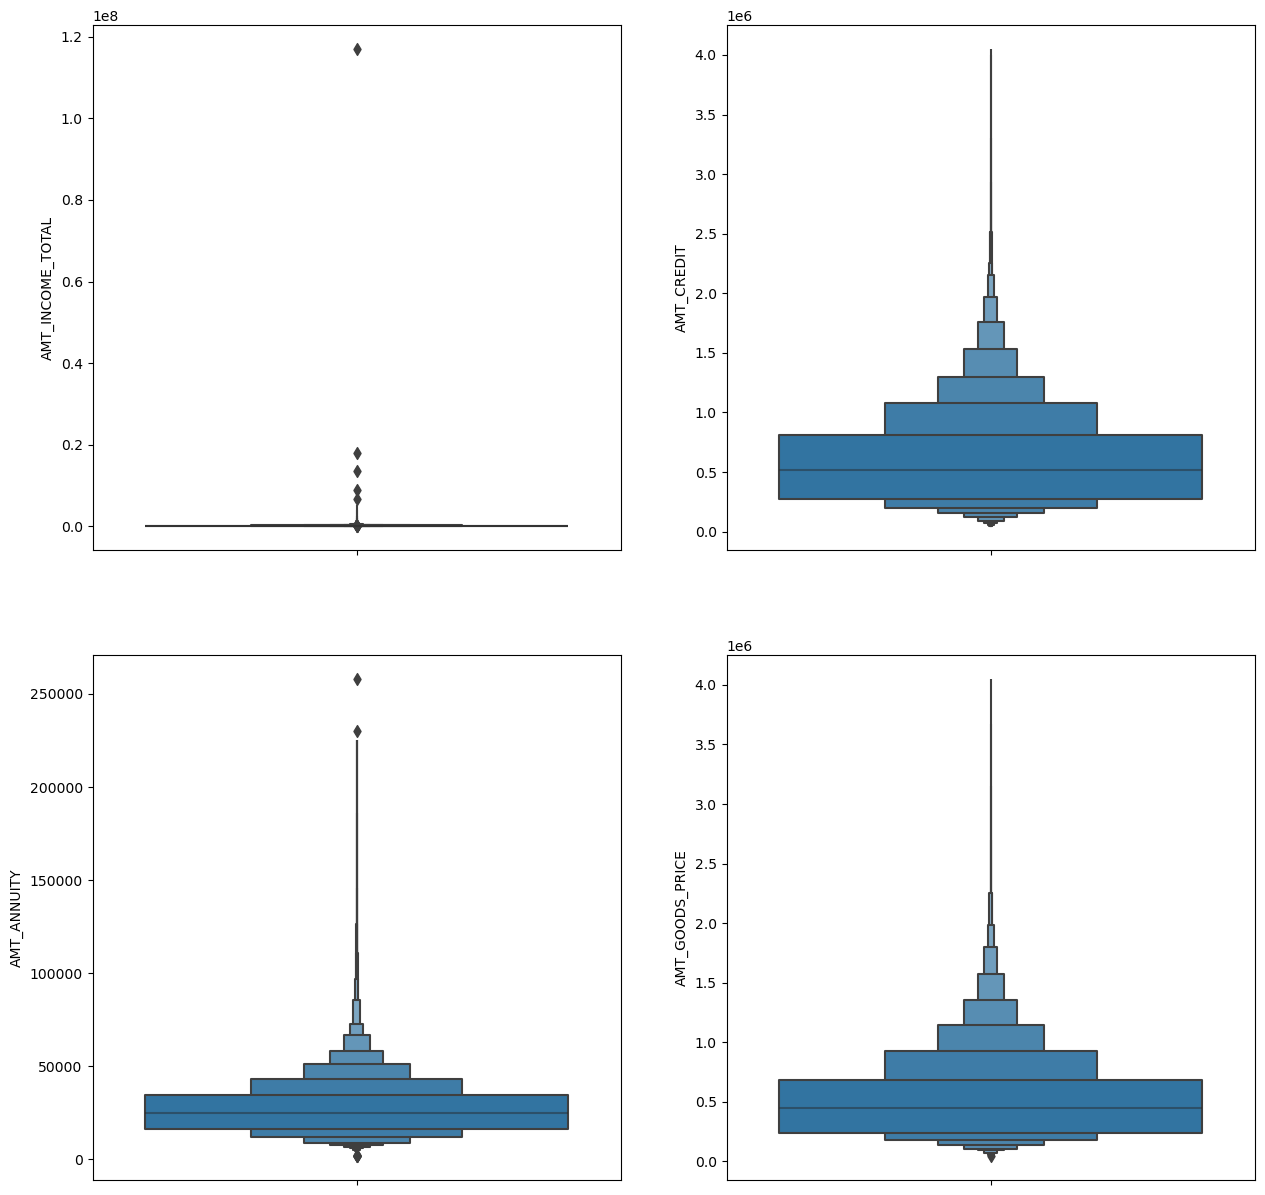

In [41]:
col = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,15))

count = 0
for i in range(0,2):
     for j in range(0,2):
            sns.boxenplot(y=app_data[col[count]], ax=axes[i,j])
            count+=1
plt.show()

In [42]:
app_data = app_data[app_data['AMT_INCOME_TOTAL'] < app_data['AMT_INCOME_TOTAL'].max()]

In [43]:
app_data = app_data[app_data['AMT_ANNUITY'] < app_data['AMT_ANNUITY'].max()]

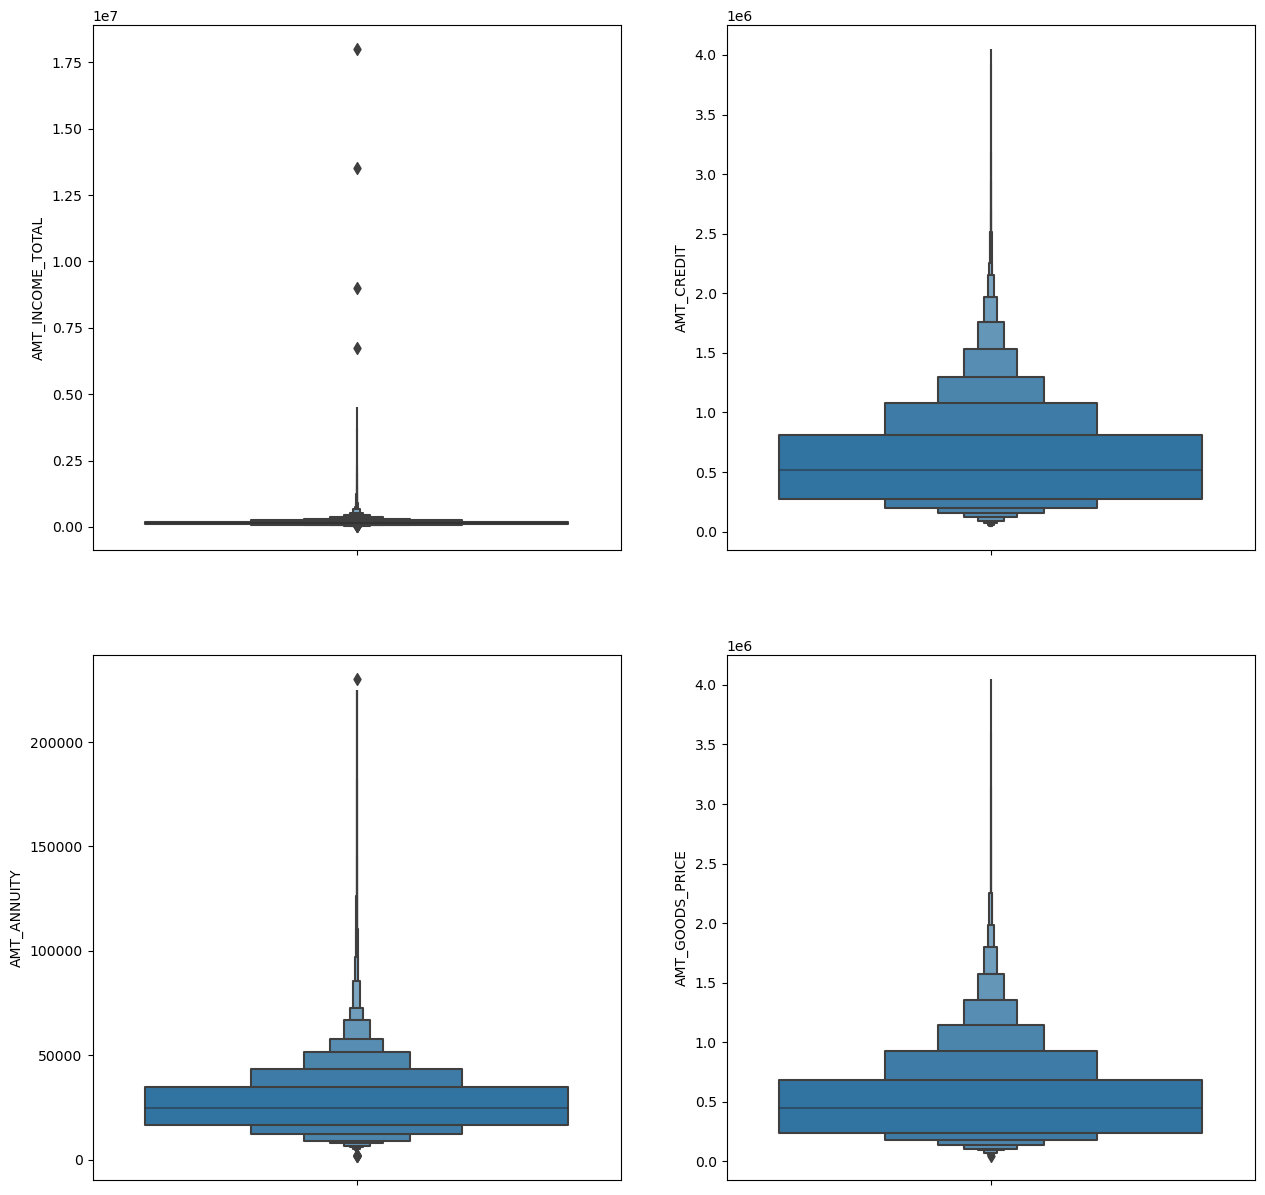

In [44]:
col = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,15))

count = 0
for i in range(0,2):
     for j in range(0,2):
            sns.boxenplot(y=app_data[col[count]], ax=axes[i,j])
            count+=1
plt.show()

In [45]:
app_data.CNT_CHILDREN.value_counts()

0     215359
1      61118
2      26748
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [46]:
app_data = app_data[app_data['CNT_CHILDREN']<=10]
app_data.shape

(307489, 53)

In [47]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
   

<Axes: ylabel='Experience'>

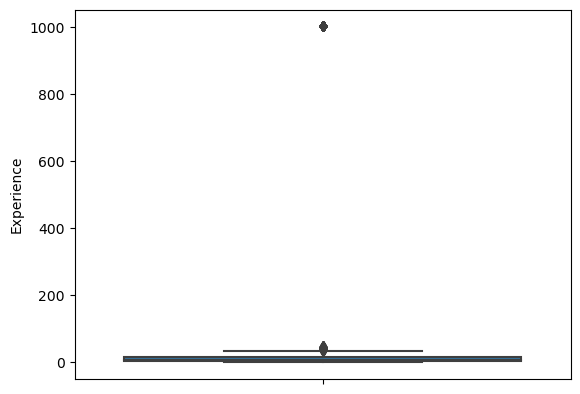

In [48]:
sns.boxplot(y=app_data['Experience'])


In [49]:
app_data['Experience'][app_data['Experience']>1000]=np.NaN


<Axes: ylabel='Experience'>

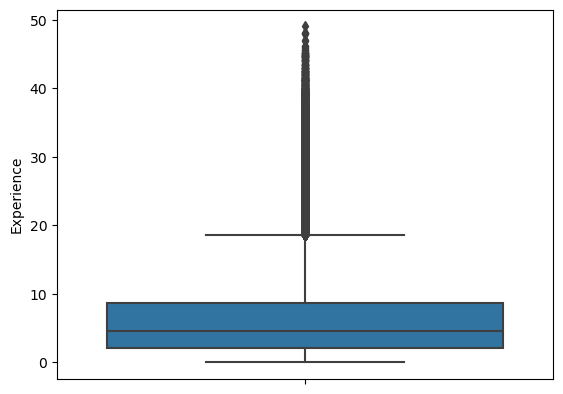

In [50]:
sns.boxplot(y=app_data['Experience'])


#### Analyzing AMT_REQ_CREDIT columns for Outliers

In [51]:
col = []
for i in app_data.columns:
    if 'AMT_REQ_' in i:
        col.append(i)
col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

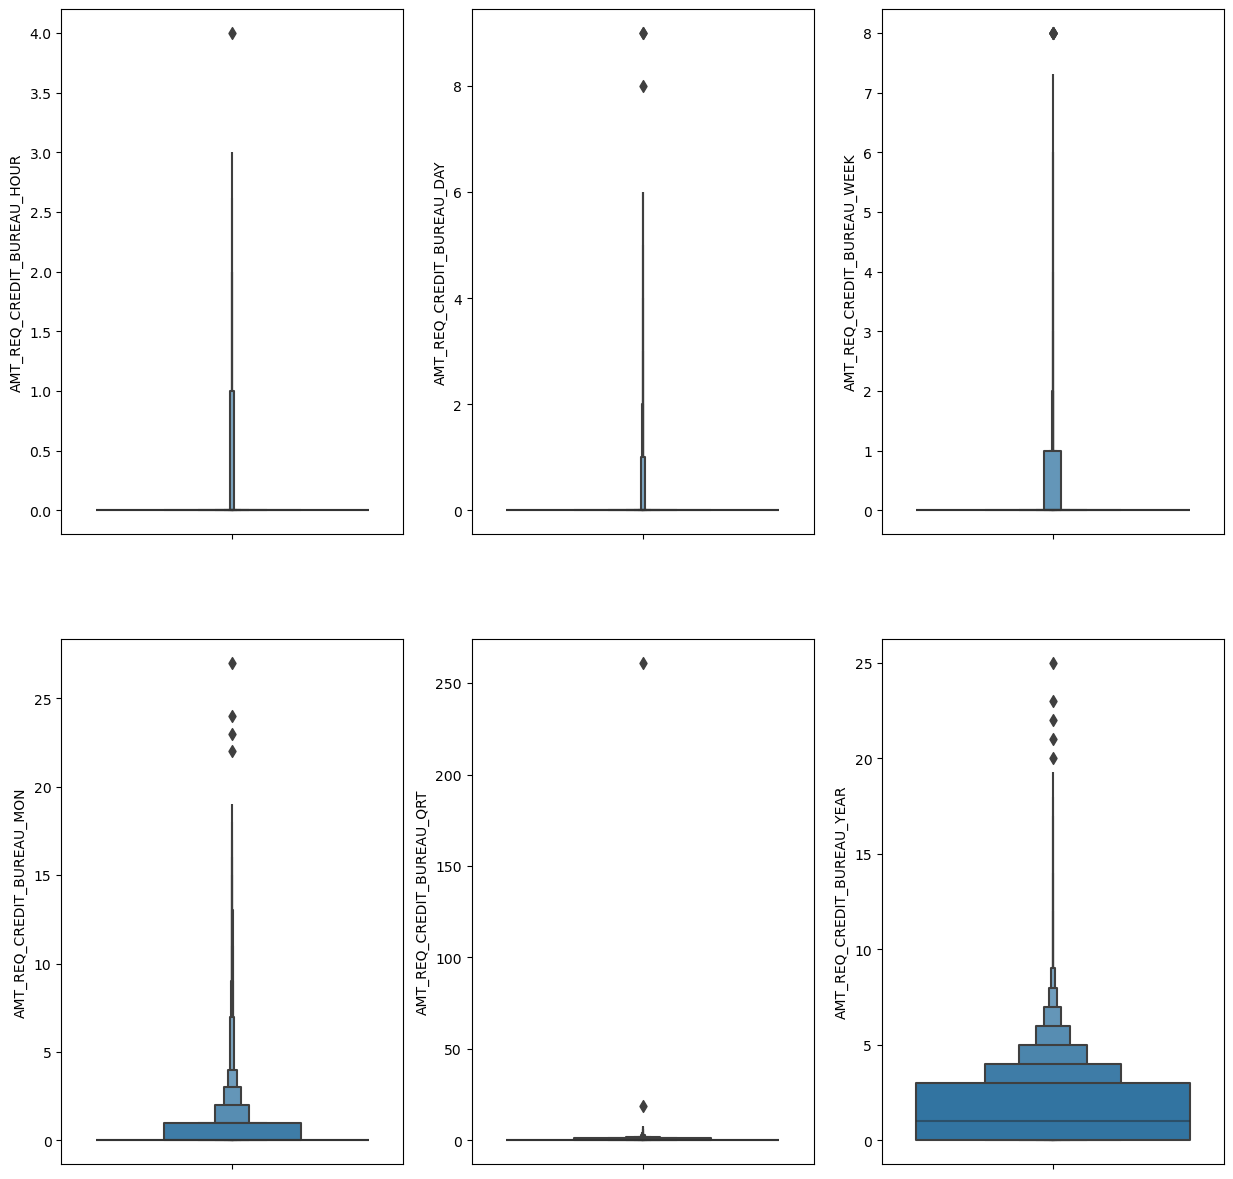

In [52]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15,15))

count = 0
for i in range(0,2):
     for j in range(0,3):
            sns.boxenplot(y=app_data[col[count]], ax=axes[i,j])
            count+=1
plt.show()

In [53]:
app_data = app_data[app_data['AMT_REQ_CREDIT_BUREAU_QRT'] <app_data['AMT_REQ_CREDIT_BUREAU_QRT'].max() ]

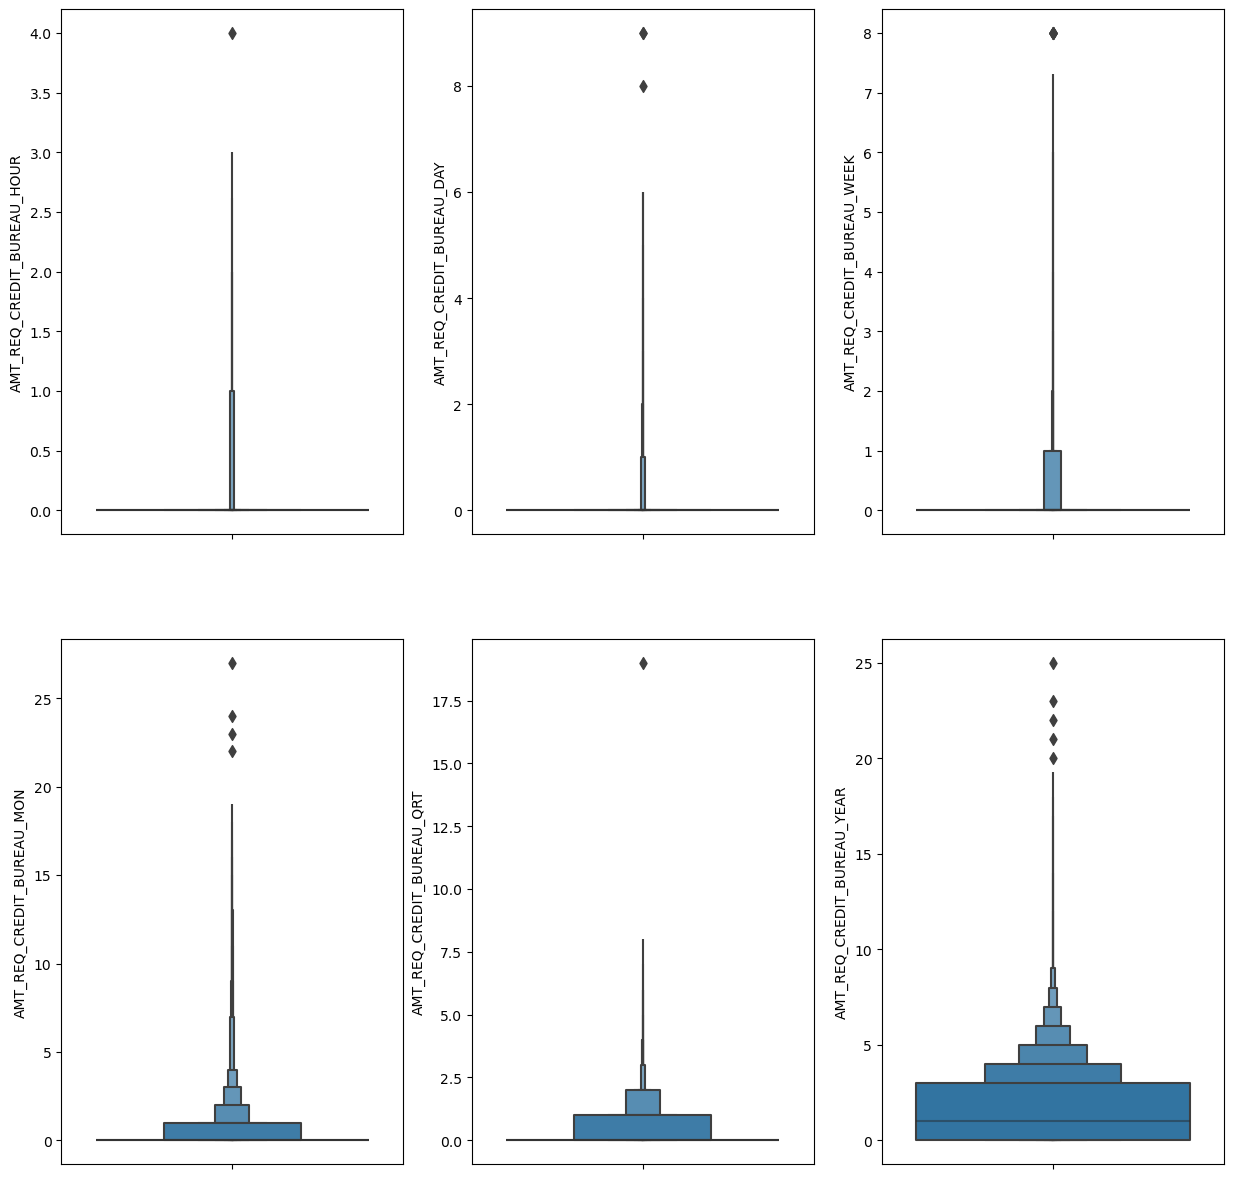

In [54]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15,15))

count = 0
for i in range(0,2):
     for j in range(0,3):
            sns.boxenplot(y=app_data[col[count]], ax=axes[i,j])
            count+=1
plt.show()

In [55]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
   

### Univarient Analysis

In [56]:
fig1 = px.bar(app_data['OCCUPATION_TYPE'].value_counts(), color=app_data['OCCUPATION_TYPE'].value_counts())
fig1.update_traces(textposition='outside', marker_coloraxis=None)
fig1.update_xaxes(title= 'Occuupation Type')
fig1.update_yaxes(title='count')
fig1.update_layout(title=
                  dict(text='Occupation Type', x=0.5, y=0.95),
                  title_font_size=30,
                  showlegend=False,
                   height=500,
                   width=1000
                  )

In [57]:
fig1 = px.bar(app_data['ORGANIZATION_TYPE'].value_counts(), color=app_data['ORGANIZATION_TYPE'].value_counts())
fig1.update_traces(textposition='outside', marker_coloraxis=None)
fig1.update_xaxes(title= 'ORGANIZATION TYPE')
fig1.update_yaxes(title='count')
fig1.update_layout(title=
                  dict(text='ORGANIZATION_TYPE', x=0.5, y=0.95),
                  title_font_size=30,
                  showlegend=False,
                   height=500,
                   width=1200
                  )

In [58]:
cols = ['Age Group','NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','CODE_GENDER','Work_Experience']

fig = make_subplots(rows=4, cols=2,
                    subplot_titles=cols,
                    horizontal_spacing=0.1,
                    vertical_spacing=0.13
                   )
count =0
for i in range (1,5):
    for j in range(1,3):
        fig.add_trace(go.Bar(x=app_data[cols[count]].value_counts().index,
                            y=app_data[cols[count]].value_counts(),
                            name = cols[count],
                            textposition='auto',
                            text= [str(i) +'%' for i in (app_data[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j),
        count+=1
fig.update_layout(title=dict(text='Analyze Categorical Variables (Freq / Percentage)', x=0.5, y=0.99),
                 title_font_size=30,
                 width=1200,
                 height=1900
                 )

fig.show()
                      

In [59]:
app_data.nunique().sort_values()

REG_REGION_NOT_WORK_REGION          2
REG_REGION_NOT_LIVE_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
CODE_GENDER                         2
NAME_CONTRACT_TYPE                  2
TARGET                              2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
AMT_CREDIT_range                    5
AMT_INCOME_TOTAL_range              5
AMT_REQ_CREDIT_BUREAU_HOUR          5
AMT_GOODS_PRICE_range               5
NAME_EDUCATION_TYPE                 5
Age Group                           5
AMT_ANNUITY_range                   5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
WEEKDAY_APPR_PROCESS_START          7
Work_Experience                     7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CRED

#### Checking imbalence

In [60]:
app_data['TARGET'].value_counts(normalize=True)

0    0.919272
1    0.080728
Name: TARGET, dtype: float64

In [61]:
fig=px.pie(values=app_data['TARGET'].value_counts(normalize=True),
          names= app_data['TARGET'].value_counts(normalize=True).index,
           hole=0.5)
fig.update_layout(title=dict(text='Target Imbalence', x=0.5, y=0.97),
                 title_font_size = 30,
                 showlegend=False
                 )

In [62]:
target1 = app_data.loc[app_data.TARGET==1]
target0 = app_data.loc[app_data.TARGET==0]

print(target0.shape)
print(target1.shape)

(282665, 53)
(24823, 53)


In [63]:
app_data.columns   

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
   

In [64]:
cols = ['Age Group','NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE']
title = [None]*(2*len(cols))
title[::2]=[i+'(non Payment dificulties)' for i in cols]
title[1::2]=[i+'(payment difficulties)' for i in cols]


# subplot initialization

fig = make_subplots(
                    rows=4,
                    cols=2,
                    subplot_titles=title
)

# adding subplots
count = 0

for i in range(1,5):
    for j in range(1,3):
        if j==1:
             fig.add_trace(go.Bar(x=target0[cols[count]].value_counts().index, 
                             y=target0[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (target0[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
        else:
            fig.add_trace(go.Bar(x=target1[cols[count]].value_counts().index, 
                             y=target1[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (target1[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
            count+=1 
fig.update_layout(
                    title=dict(text = "Analyze Categorical variables (Payment/ Non-Payment Difficulties)",x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    height = 1600,
                  )
fig.show()

In [65]:
cols = ['NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','CODE_GENDER','Work_Experience']
title = [None]*(2*len(cols))
title[::2]=[i+' (Non-Payment Difficulties)' for i in cols]
title[1::2]=[i+' (Payment Difficulties)' for i in cols]

# subplot initialization

fig = make_subplots(rows=4,
                   cols = 2,
                   subplot_titles=title)
count=0

for i in range(1,5):
    
    for j in range(1,3):
        
        if j == 1:
            fig.add_trace(go.Bar(x=target0[cols[count]].value_counts().index,
                                y=target0[cols[count]].value_counts(),
                                name=cols[count],
                                textposition='auto',
                                text=[str(i)+'%' for i in (target0[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                                ),
                          row = i, col=j)
            
        else:
            fig.add_trace(go.Bar(x=target1[cols[count]].value_counts().index,
                                y=target1[cols[count]].value_counts(),
                                name=cols[count],
                                textposition='auto',
                                text=[str(i)+'%' for i in (target1[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                                ),
                          row = i, col=j)
            count+=1
            
fig.update_layout(title=dict(text='Analyze categorical variable (Payment | Non Payment Difficulties)', x=0.5, y=0.99),
                 title_font_size=30,
                 showlegend=False,
                 height=2000)


In [66]:
col =[]

for i in app_data.columns:
    if 'range' in i:
        col.append(i)
col

['AMT_INCOME_TOTAL_range',
 'AMT_CREDIT_range',
 'AMT_ANNUITY_range',
 'AMT_GOODS_PRICE_range']

In [67]:
app_data['AMT_INCOME_TOTAL_range'].dtype

CategoricalDtype(categories=['Very Low', 'Low', 'Medium', 'High', 'Very High'], ordered=True)

In [68]:
cols = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE' ,'AMT_INCOME_TOTAL_range','AMT_CREDIT_range']
title = [None]*(2*len(cols))
title[::2]=[i+' (Non-Payment Difficulties)' for i in cols]
title[1::2]=[i+' (Payment Difficulties)' for i in cols]

# subplot initialization

fig = make_subplots(rows=4,
                   cols = 2,
                   subplot_titles=title)
count=0

for i in range(1,5):
    
    for j in range(1,3):
        
        if j == 1:
            fig.add_trace(go.Bar(x=target0[cols[count]].value_counts().index,
                                y=target0[cols[count]].value_counts(),
                                name=cols[count],
                                textposition='auto',
                                text=[str(i)+'%' for i in (target0[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                                ),
                          row = i, col=j)
            
        else:
            fig.add_trace(go.Bar(x=target1[cols[count]].value_counts().index,
                                y=target1[cols[count]].value_counts(),
                                name=cols[count],
                                textposition='auto',
                                text=[str(i)+'%' for i in (target1[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                                ),
                          row = i, col=j)
            count+=1
            
fig.update_layout(title=dict(text='Analyze categorical variable (Payment | Non Payment Difficulties)', x=0.5, y=0.99),
                 title_font_size=30,
                 showlegend=False,
                 height=2000)

### Bivariate / Multivariate analysis

In [69]:
df1 = app_data.groupby(by=['AMT_CREDIT_range','CODE_GENDER']).count().reset_index()[['AMT_CREDIT_range','CODE_GENDER','SK_ID_CURR']]

In [70]:
df1

,AMT_CREDIT_range,CODE_GENDER,SK_ID_CURR
0,Very Low,F,44072
1,Very Low,M,20849
2,Low,F,38181
3,Low,M,19911
4,Medium,F,39804
5,Medium,M,21741
6,High,F,42358
7,High,M,21662
8,Very High,F,38017
9,Very High,M,20889


In [71]:
df2 = app_data.groupby(by=['AMT_INCOME_TOTAL_range','CODE_GENDER']).count().reset_index()[['AMT_INCOME_TOTAL_range','CODE_GENDER','SK_ID_CURR']]
df2

,AMT_INCOME_TOTAL_range,CODE_GENDER,SK_ID_CURR
0,Very Low,F,51462
1,Very Low,M,12205
2,Low,F,59966
3,Low,M,25787
4,Medium,F,23181
5,Medium,M,12268
6,High,F,43438
7,High,M,32067
8,Very High,F,24385
9,Very High,M,22725


In [72]:
fig1 = px.bar(data_frame=df1, 
             x='AMT_CREDIT_range',
             y= 'SK_ID_CURR', color='CODE_GENDER',
             barmode= 'group')
fig1.update_traces(textposition='outside')
fig1.update_xaxes(title='Day') 
fig1.update_yaxes(title='Transaction count')
fig1.update_layout(
                    title=dict(text = "Loan Applications by Gender & Credit Range",x=0.5,y=0.95),
                    title_font_size=20,
                  )
fig1.show()

In [73]:
fig1 = px.bar(data_frame=df2, 
             x='AMT_INCOME_TOTAL_range',
             y= 'SK_ID_CURR', color='CODE_GENDER',
             barmode= 'group')
fig1.update_traces(textposition='outside')
fig1.update_xaxes(title='Day') 
fig1.update_yaxes(title='Transaction count')
fig1.update_layout(
                    title=dict(text = "Loan Applications by Gender & Credit Range",x=0.5,y=0.95),
                    title_font_size=20,
                  )
fig1.show()

### Education Type VS Credit Amount (Payment / Non Payment Difficulties)

In [74]:
fig = px.box(target0, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', color='NAME_FAMILY_STATUS',
            title='Education Type VS Credit Amount (Non Payment Difficulties)')
fig.show()

In [75]:
fig = px.box(target1, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', color='NAME_FAMILY_STATUS',
            title='Education Type VS Credit Amount (Non Payment Difficulties)')
fig.show()

### Income VS Credit Amount (Payment / Non Payment Difficulties)

In [76]:
fig = px.box(target0, x='AMT_INCOME_TOTAL_range', y='AMT_CREDIT', color='NAME_FAMILY_STATUS',
            title='AMT_INCOME_TOTAL_range VS Credit Amount (Non Payment Difficulties)')
fig.show()

In [77]:
fig = px.box(target1, x='AMT_INCOME_TOTAL_range', y='AMT_CREDIT', color='NAME_FAMILY_STATUS',
            title='AMT_INCOME_TOTAL_range VS Credit Amount (Non Payment Difficulties)')
fig.show()

In [78]:
fig = px.box(target0, x='Age Group', y='AMT_CREDIT', color='NAME_FAMILY_STATUS',
            title='AMT_INCOME_TOTAL_range VS Credit Amount (Non Payment Difficulties)')
fig.show()

In [79]:
fig = px.box(target1, x='Age Group', y='AMT_CREDIT', color='NAME_FAMILY_STATUS',
            title='AMT_INCOME_TOTAL_range VS Credit Amount (Non Payment Difficulties)')
fig.show()

### Numerical vs Numerical Variables

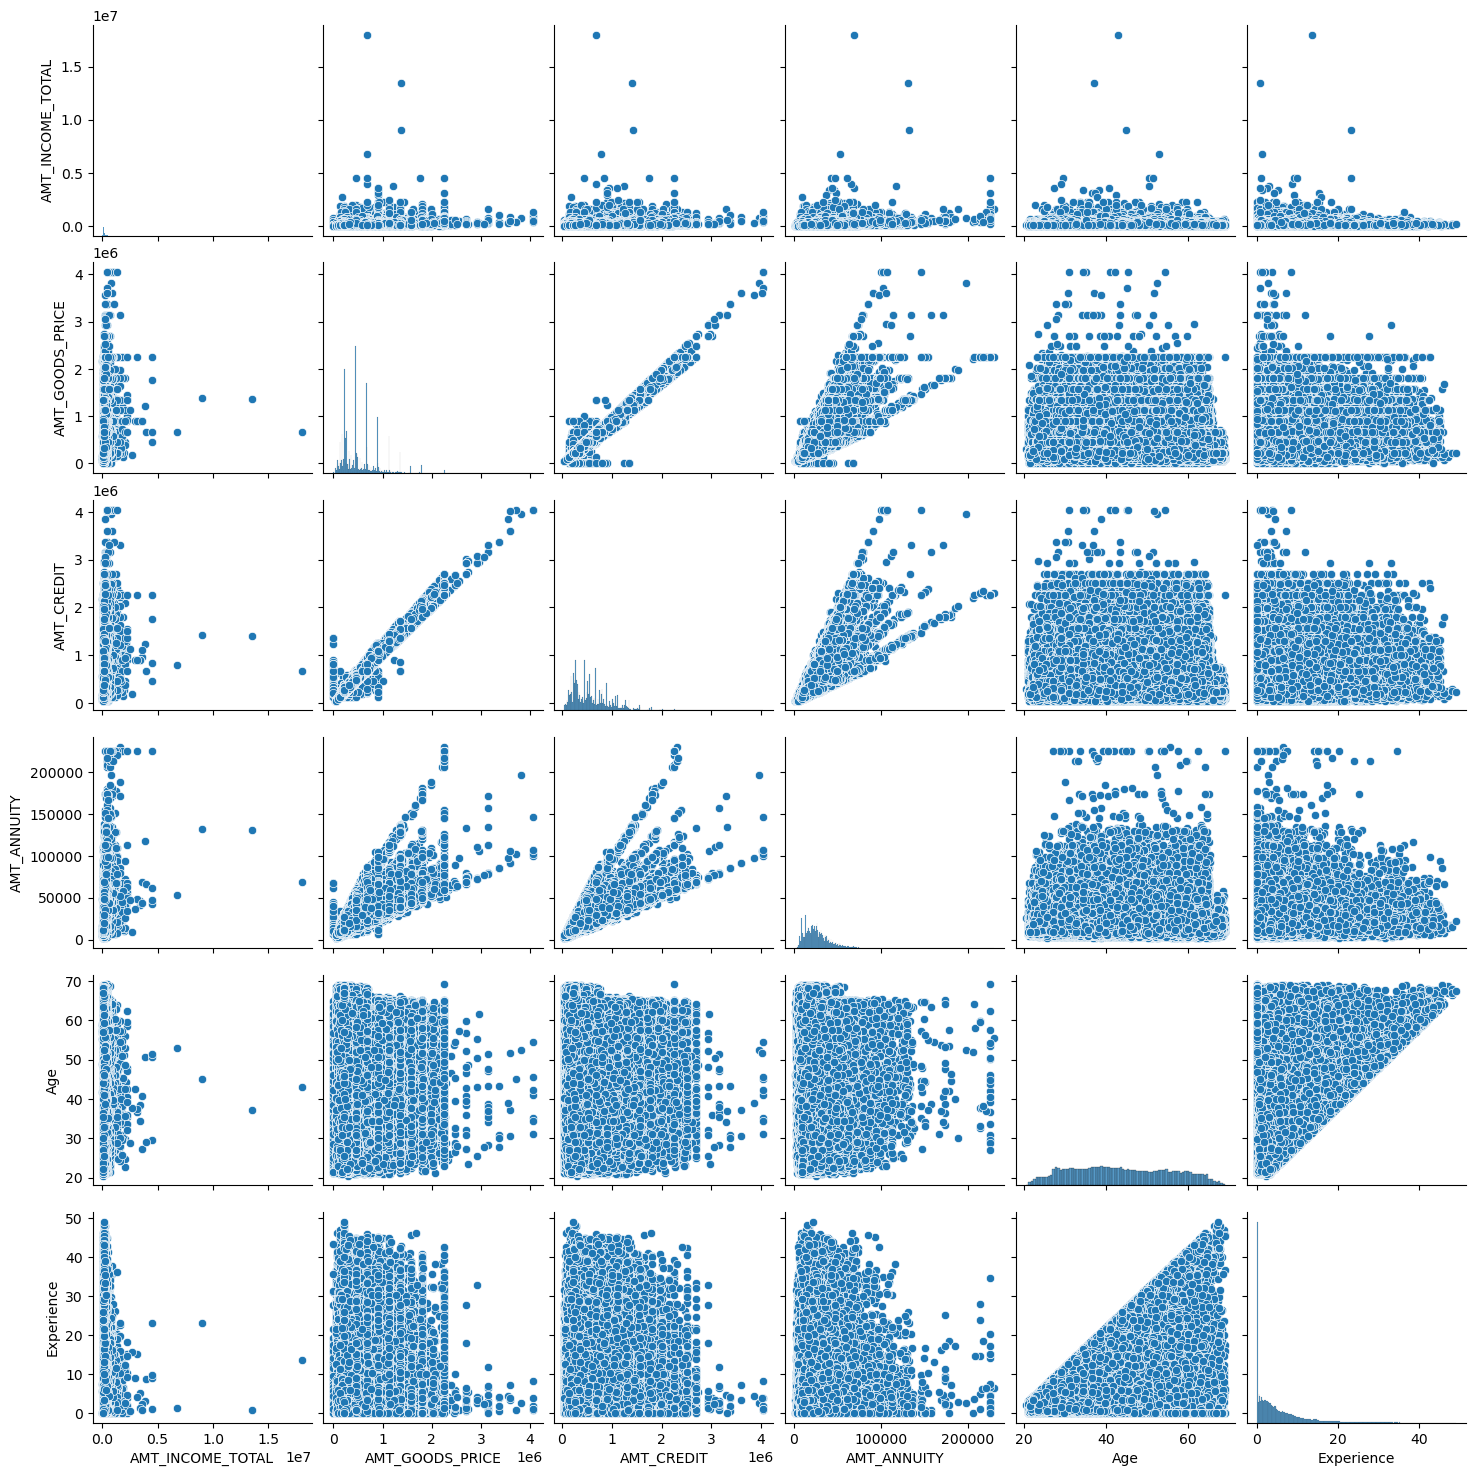

In [80]:
sns.pairplot(app_data[['AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 
                       'AMT_CREDIT', 'AMT_ANNUITY',
                       'Age','Experience' ]].fillna(0))
plt.show()

### Correlation between target 0 and 1

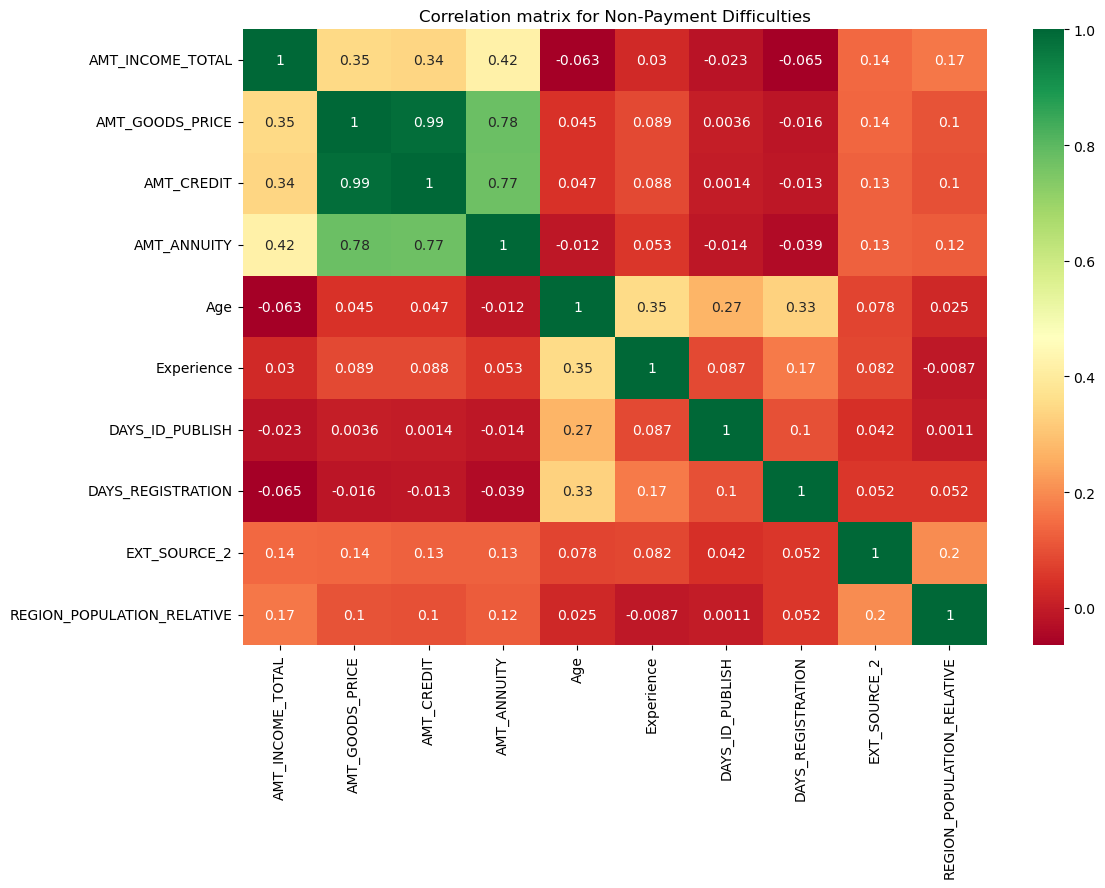

In [82]:
plt.figure(figsize=(12,8)) 
sns.heatmap(target0[['AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 
                       'AMT_CREDIT', 'AMT_ANNUITY',
                       'Age','Experience' ,
                       'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
                       'EXT_SOURCE_2','EXT_SOURCE_3','REGION_POPULATION_RELATIVE']].corr(), annot=True, cmap="RdYlGn")
plt.title('Correlation matrix for Non-Payment Difficulties')
plt.show()

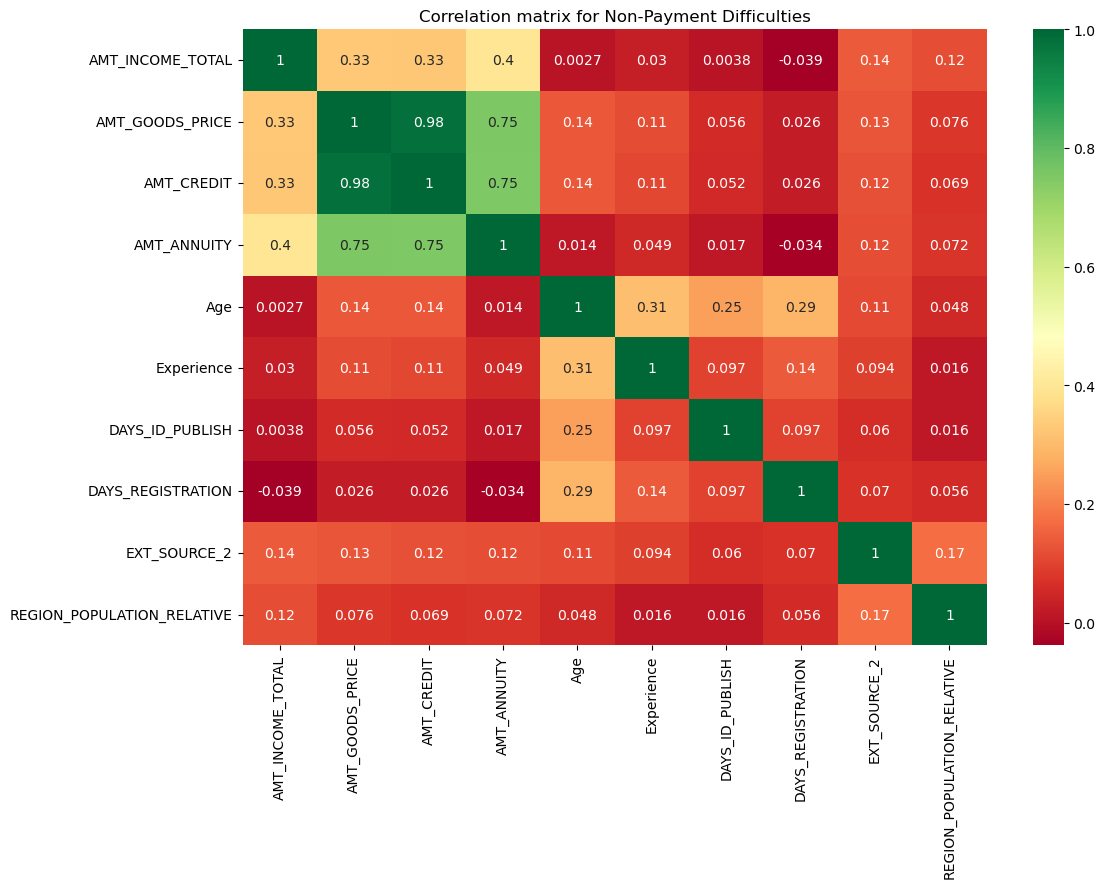

In [83]:
plt.figure(figsize=(12,8)) 
sns.heatmap(target1[['AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 
                       'AMT_CREDIT', 'AMT_ANNUITY',
                       'Age','Experience' ,
                       'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
                       'EXT_SOURCE_2','EXT_SOURCE_3','REGION_POPULATION_RELATIVE']].corr(), annot=True, cmap="RdYlGn")
plt.title('Correlation matrix for Non-Payment Difficulties')
plt.show()

### Data Analysis on Previous Application dataset

In [84]:
pap = pd.read_csv('/kaggle/input/credit-eda-case-study/previous_application.csv')
pap.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
s1= (pap.isnull().mean()*100).sort_values(ascending=False)[pap.isnull().mean()*100 > 40]
s1

NAME_CASH_LOAN_PURPOSE    95.830774
CODE_REJECT_REASON        81.327123
NAME_PRODUCT_TYPE         63.684414
NAME_GOODS_CATEGORY       56.927376
NAME_SELLER_INDUSTRY      51.234153
dtype: float64

In [92]:
pap.drop(columns = s1.index,inplace=True)

In [93]:
pap.DAYS_DECISION = abs(pap.DAYS_DECISION)
pap.DAYS_DECISION

0            73
1           164
2           301
3           512
4           781
           ... 
1670209     544
1670210    1694
1670211    1488
1670212    1185
1670213    1193
Name: DAYS_DECISION, Length: 1670214, dtype: int64

In [94]:
pap=pap.replace('XNA', np.NaN)
pap=pap.replace('XAP', np.NaN)

### Univariate Analysis on Previous Application Data

In [96]:

pap.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Approved,73,Cash through the bank,Repeater,POS,Country-wide,35,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Approved,164,NaN,Repeater,Cash,Contact center,-1,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Approved,301,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Approved,512,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Refused,781,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,24.0,high,Cash Street: high


In [97]:
pap.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [104]:
cols = ['NAME_CONTRACT_STATUS','WEEKDAY_APPR_PROCESS_START', 
        'NAME_PAYMENT_TYPE','CODE_REJECT_REASON', 
        'NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','PRODUCT_COMBINATION' ]
fig= make_subplots(rows=3,
                  cols=2,
                  subplot_titles=cols,
                  horizontal_spacing=0.1,
                  vertical_spacing=0.17
                  )

count = 0
for i in range(1,4):
    for j in range(1,3):
        fig.add_trace(go.Bar(x=pap[cols[count]].value_counts().index,
                            y=pap[cols[count]].value_counts(),
                            textposition='auto',
                            text=[str(i) + '%' for i in (pap[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                     row=i, col=j)
    
fig.update_layout(title=dict(text = 'Analyze Categorical Variables (Freq / Percentage)', x=0.5, y=0.98),
                      title_font_size = 20,
                      showlegend=False,
                      height = 1600,
                      width=1000
                     )
    
fig.show()

### Approved Loans

In [105]:
pap.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [110]:
approved = pap[pap.NAME_CONTRACT_STATUS =='Approved']

In [111]:
approved


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Approved,73,Cash through the bank,Repeater,POS,Country-wide,35,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Approved,164,NaN,Repeater,Cash,Contact center,-1,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Approved,301,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Approved,512,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.0,middle,Cash X-Sell: middle
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,...,Approved,684,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,18.0,low_normal,Cash X-Sell: low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,...,Approved,544,Cash through the bank,Refreshed,POS,Stone,43,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,...,Approved,1694,Cash through the bank,New,POS,Stone,43,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,...,Approved,1488,Cash through the bank,Repeater,POS,Country-wide,1370,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,...,Approved,1185,Cash through the bank,Repeater,Cash,AP+ (Cash loan),-1,12.0,low_normal,Cash X-Sell: low


In [112]:
cols = ['NAME_PORTFOLIO','NAME_GOODS_CATEGORY',
        'CHANNEL_TYPE','NAME_YIELD_GROUP' , 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE']

fig= make_subplots(rows=3,
                  cols=2,
                  subplot_titles=cols,
                  horizontal_spacing=0.1,
                  vertical_spacing=0.17
                  )

count = 0
for i in range(1,4):
    for j in range(1,3):
        fig.add_trace(go.Bar(x=approved[cols[count]].value_counts().index,
                            y=approved[cols[count]].value_counts(),
                            textposition='auto',
                            text=[str(i) + '%' for i in (approved[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                     row=i, col=j)
    
fig.update_layout(title=dict(text = 'Analyze Categorical Variables (Freq / Percentage)', x=0.5, y=0.98),
                      title_font_size = 20,
                      showlegend=False,
                      height = 1600,
                      width=1000
                     )
    
fig.show()

In [113]:
refused = pap[pap.NAME_CONTRACT_STATUS =='Refused']


In [115]:
cols = ['NAME_PORTFOLIO','NAME_GOODS_CATEGORY',
        'CHANNEL_TYPE','NAME_YIELD_GROUP' , 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE']

fig= make_subplots(rows=3,
                  cols=2,
                  subplot_titles=cols,
                  horizontal_spacing=0.1,
                  vertical_spacing=0.17
                  )

count = 0
for i in range(1,4):
    for j in range(1,3):
        fig.add_trace(go.Bar(x=refused[cols[count]].value_counts().index,
                            y=refused[cols[count]].value_counts(),
                            textposition='auto',
                            text=[str(i) + '%' for i in (refused[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                     row=i, col=j)
    
fig.update_layout(title=dict(text = 'Analyze Categorical Variables (Freq / Percentage)', x=0.5, y=0.98),
                      title_font_size = 20,
                      showlegend=False,
                      height = 1400,
                      width=1000
                     )
    
fig.show()

### Merging Application & Previous Application Data

In [116]:
mapp_data = app_data.merge(pap, on='SK_ID_CURR', how='inner')
mapp_data.shape

(1413577, 73)

In [136]:
def plot_merge(mapp_data,column_name):
    col_value = ['Refused','Approved', 'Canceled' , 'Unused offer']
    
    #Subplot initialization
    fig = make_subplots(
                     rows=2, 
                     cols=2,
                     subplot_titles=col_value,
                     horizontal_spacing=0.1,
                     vertical_spacing=0.3
                   )
    # Adding subplots
    count=0
    for i in range(1,3):
        for j in range(1,3):
            fig.add_trace(go.Bar(x=mapp_data[mapp_data['NAME_CONTRACT_STATUS']==col_value[count]][column_name].value_counts().index, 
                             y=mapp_data[mapp_data['NAME_CONTRACT_STATUS']==col_value[count]][column_name].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (mapp_data[mapp_data['NAME_CONTRACT_STATUS']==col_value[count]][column_name].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
            count+=1
    fig.update_layout(
                    title=dict(text = "NAME_CONTRACT_STATUS VS "+column_name,x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    width = 960,
                    height = 960,
                  )
    fig.show()

    
    
    
    
    

# Function for multiple plotting - Pie Chart
def plot_pie_merge(mapp_data,column_name):
    col_value = ['Refused','Approved', 'Canceled' , 'Unused offer']
    
    #Subplot initialization
    fig = make_subplots(
                     rows=2, 
                     cols=2,
                     subplot_titles=col_value,
                     specs=[[{"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}]],
                   )
    # Adding subplots
    count=0
    for i in range(1,3):
        for j in range(1,3):
            fig.add_trace(go.Pie(labels=mapp_data[mapp_data['NAME_CONTRACT_STATUS']==col_value[count]][column_name].value_counts().index, 
                             values=mapp_data[mapp_data['NAME_CONTRACT_STATUS']==col_value[count]][column_name].value_counts(),
                             textinfo='percent',
                             insidetextorientation='auto',
                             hole=.3
                            ),
                      row=i,col=j)
            count+=1
    fig.update_layout(
                    title=dict(text = "NAME_CONTRACT_STATUS VS "+column_name,x=0.5,y=0.99),
                    title_font_size=20,
                    width = 960,
                    height = 960,
                  )
    fig.show()

In [132]:
plot_pie_merge(mapp_data,'NAME_CONTRACT_TYPE_y')

In [133]:
plot_pie_merge(mapp_data,'NAME_CLIENT_TYPE')

In [134]:
plot_pie_merge(mapp_data,'CODE_GENDER')

In [137]:
plot_merge(mapp_data,'NAME_EDUCATION_TYPE')